In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("data/titanic_data_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
len(df)

891

In [48]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
df.isna().sum().sum()

866

#### The NaN problem will be solved using the mean of the respective column

In [50]:
df.mean()

/tmp/ipykernel_44818/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [51]:
mean_age = df.mean()["Age"]
mean_age

/tmp/ipykernel_44818/3064594116.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_age = df.mean()["Age"]


29.69911764705882

In [52]:
df["Age"].fillna(mean_age, inplace=True)

In [53]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### removing the lines where embarked is nan

In [54]:
df.dropna(subset=["Embarked"], inplace=True)

In [55]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### solving the cabin nan problem

In [56]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 889, dtype: object

In [57]:
A = df["Cabin"].str.startswith("A").sum()
A

15

In [58]:
B = df["Cabin"].str.startswith("B").sum()
B

45

In [59]:
C = df["Cabin"].str.startswith("C").sum()
C

59

In [60]:
D = df["Cabin"].str.startswith("D").sum()
D

33

In [61]:
E = df["Cabin"].str.startswith("E").sum()
E

32

In [62]:
F = df["Cabin"].str.startswith("F").sum()
F

13

In [63]:
G = df["Cabin"].str.startswith("G").sum()
G

4

In [64]:
total_cabin = A + B + C + D + E + F + G
print(total_cabin)
perA = A/total_cabin
perB = B/total_cabin
perC = C/total_cabin
perD = D/total_cabin
perE = E/total_cabin
perF = F/total_cabin
perG = G/total_cabin

201


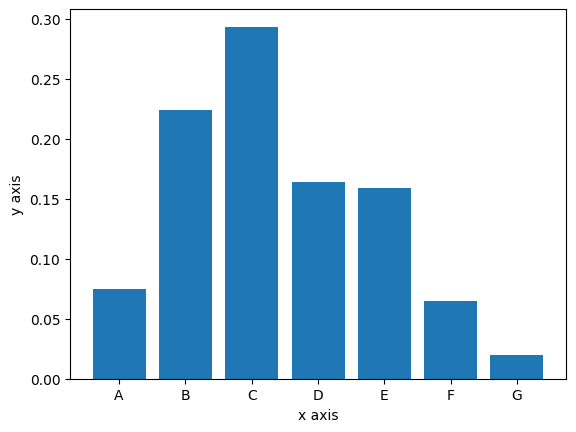

In [65]:
x = ["A", "B", "C", "D", "E", "F", "G"]
y = [perA, perB, perC, perD, perE, perF, perG]
plt.bar(x, y)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

#### I will folow this distribution to fill the nan in the cabin column

In [71]:
total_cabin_nan = df.isna()["Cabin"].sum()
print(total_cabin_nan)
fill_A = perA * total_cabin_nan
fill_B = perB * total_cabin_nan
fill_C = perC * total_cabin_nan
fill_D = perD * total_cabin_nan
fill_E = perE * total_cabin_nan
fill_F = perF * total_cabin_nan
fill_G = perG * total_cabin_nan
total_to_fill = fill_A + fill_B + fill_C + fill_D + fill_E + fill_F + fill_G
print(total_to_fill)

687
687.0


#### working on the number of the cabin (the letter is solved)